In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import matplotlib.font_manager as fm

from konlpy.tag import Okt
from PIL import Image
from collections import Counter
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'NanumSquare'

In [2]:
# hate : 0
# none : 1

# Data load

In [3]:
data1 = pd.read_csv('data/data1.csv', sep='\t')
data1

,content,lable
0,이종석 한효주 나오는 드라마 이후로 드라마 안봤다. 2년전인가?? 좀 신선했었지. ...,0.0
1,씨바알..노무노무 술프노... 오늘 저녁은 꽂등심이다ㅠㅜ,0.0
2,짱깨 꺼라ㅡ패쓰,0.0
3,그들의 사생활 ~ 고인이된 설리를 위해서라도 모두 조용하길 지금 누굴 탓한다고 무슨...,1.0
4,아무리 법이 뭣같아도 무슨 자격으로 개인의 신상정보를 불특정 다수에게 공개하는지 도...,1.0
...,...,...
9995,이거 보다 더한 막장의 드라마도 넋놓고 보면서 무슨?,1.0
9996,머...제네시스..올라프에디션?,1.0
9997,항상 여자로 ㅡ ㅡ 저지랄 들이야 남자들 벗겨봐라,0.0
9998,첫번째 이유가 ㄹㅇ 맞지특히나 뉴스나 기사 몇줄읽은 학생들끼리 대화해도 서로 존나 ...,0.0


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   content  10000 non-null  object 
 1   lable    9975 non-null   float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


# Preprocessing

In [5]:
data1 = data1.rename(columns={'lable':'label'})

In [6]:
null_data = data1[data1['label'].isnull()]
null_data['label'] = null_data['content'].str.split('\t').str[1]
null_data['content'] = null_data['content'].str.split('\t').str[0]
null_data

,content,label
1602,"응애 응애 엄마 저 맘에 안들죠? ........아들 ?? "" 너 내가 우스워 보이...",0
1654,"토니스타크 평소 ""아이엠그루트""라는 유행어를 부러워했다는게 학계의 정설",1
1992,"""13일 현대차에 따르면 올 들어 국내 소비자들의 수입차 구매의향률이 3년 만에 하...",1
2920,"에이프릴이 한마디 합니다 ""예쁜게 죄"" 구하라님 ""무기징역""",1
3720,"답글 글씨체를 봐라 저게 애새끼가 쓴거냐?""빨갱이새끼가 쓴거지 ㅁㅈㅎㅉㅉ",0
3807,알겠다이기ㅋㅋ 딱 채찍쳐맞는거 좋아하는 한국식 마인드네. 노예마인드. 조금만 성공한...,0
3908,"이래서 스스로 걸리거든 ""죄인들이""~ㅎㅎㅎ 재미보고 털리고 그치~~~?",0
4241,"아버지는 내재된 악마들을 다룰 정신적 힘을 가지고 있지 않았다."" 이 말한마디가 사...",1
4283,"댓글 중 ""선동 당해서 촞불든 개돼지 홍어들도 단죄를 받아야 할 공범자들이다""에100ㅂ!",0
5000,"스파이 제안받고 살해 안당하는 법1. 처음에 스파이 제안을 받았을때 ""중국을 위해서...",0


In [7]:
df1 = pd.concat([data1, null_data])
df1.dropna(axis=0, inplace=True)
df1 = df1.astype({'label':'int'})
df1 = df1.reset_index(drop=True)
df1

,content,label
0,이종석 한효주 나오는 드라마 이후로 드라마 안봤다. 2년전인가?? 좀 신선했었지. ...,0
1,씨바알..노무노무 술프노... 오늘 저녁은 꽂등심이다ㅠㅜ,0
2,짱깨 꺼라ㅡ패쓰,0
3,그들의 사생활 ~ 고인이된 설리를 위해서라도 모두 조용하길 지금 누굴 탓한다고 무슨...,1
4,아무리 법이 뭣같아도 무슨 자격으로 개인의 신상정보를 불특정 다수에게 공개하는지 도...,1
...,...,...
9995,"몽골한테 ""최근에"" 250년간 지배당하고 집단강간을 당했는데 동양피가 하나도 안섞였...",0
9996,뭐 선천적으로 여성스럽거나 여자역할을 하고 싶어하는 동성애자들 그럴 수 있다고는 생...,0
9997,"ㄹㅇ 시발 그냥 ""다른 진로 생각해 보세요""라고만 했어도 욕 안처 먹었지.",0
9998,"간만에 이단어가 떠오르는군 ""이뭐병""",0


In [8]:
data2 = pd.read_csv('data/data2.txt', sep='\t')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7896 entries, 0 to 7895
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   comments             7896 non-null   object
 1   contain_gender_bias  7896 non-null   bool  
 2   bias                 7896 non-null   object
 3   hate                 7896 non-null   object
dtypes: bool(1), object(3)
memory usage: 192.9+ KB


In [9]:
data2.drop(['contain_gender_bias', 'bias'], axis=1, inplace=True)

In [10]:
data2['hate'].value_counts()

none         3486
offensive    2499
hate         1911
Name: hate, dtype: int64

In [11]:
data2.replace({'hate':0, 'none': 1, 'offensive':0}, inplace=True)

In [12]:
data2 = data2.rename(columns={'comments':'content', 'hate':'label'})

In [13]:
data2['label'].value_counts()

0    4410
1    3486
Name: label, dtype: int64

In [14]:
df = pd.concat([df1, data2])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17896 entries, 0 to 7895
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  17896 non-null  object
 1   label    17896 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 419.4+ KB


In [16]:
df = df.reset_index(drop=True)

In [17]:
df.head()

,content,label
0,이종석 한효주 나오는 드라마 이후로 드라마 안봤다. 2년전인가?? 좀 신선했었지. ...,0
1,씨바알..노무노무 술프노... 오늘 저녁은 꽂등심이다ㅠㅜ,0
2,짱깨 꺼라ㅡ패쓰,0
3,그들의 사생활 ~ 고인이된 설리를 위해서라도 모두 조용하길 지금 누굴 탓한다고 무슨...,1
4,아무리 법이 뭣같아도 무슨 자격으로 개인의 신상정보를 불특정 다수에게 공개하는지 도...,1


In [18]:
content_list = []

for content in df['content'] :
    content = re.sub("[^0-9가-힣ㄱ-ㅎㅏ-ㅣ\\s]","", content)
    content_list.append(content)

In [19]:
df['content'] = content_list

In [20]:
df

,content,label
0,이종석 한효주 나오는 드라마 이후로 드라마 안봤다 2년전인가 좀 신선했었지 근데 이...,0
1,씨바알노무노무 술프노 오늘 저녁은 꽂등심이다ㅠㅜ,0
2,짱깨 꺼라ㅡ패쓰,0
3,그들의 사생활 고인이된 설리를 위해서라도 모두 조용하길 지금 누굴 탓한다고 무슨소...,1
4,아무리 법이 뭣같아도 무슨 자격으로 개인의 신상정보를 불특정 다수에게 공개하는지 도...,1
...,...,...
17891,힘내세요 응원합니다,1
17892,힘내세요삼가 고인의 명복을 빕니다,1
17893,힘내세용 항상 응원합니닷,1
17894,힘내소연기로 답해요나도 53살 인데 이런일 저런일 다 있더라구요인격을 믿습니다홨팅,1


In [21]:
df.to_csv('data/hate_data.csv', index=False)

In [22]:
hate_data = pd.read_csv('data/hate_data.csv')
hate_data.drop_duplicates(subset=['content'], inplace=True)
hate_data.reset_index(drop=True)

,content,label
0,이종석 한효주 나오는 드라마 이후로 드라마 안봤다 2년전인가 좀 신선했었지 근데 이...,0
1,씨바알노무노무 술프노 오늘 저녁은 꽂등심이다ㅠㅜ,0
2,짱깨 꺼라ㅡ패쓰,0
3,그들의 사생활 고인이된 설리를 위해서라도 모두 조용하길 지금 누굴 탓한다고 무슨소...,1
4,아무리 법이 뭣같아도 무슨 자격으로 개인의 신상정보를 불특정 다수에게 공개하는지 도...,1
...,...,...
12980,희철이가 트와이스 사귀는거 보고 트와이스 하나 노리나 보다 ㅋㅋㅋㅋㅋㅋ,1
12981,히든싱어도 끝났다예전에 비해 가수의 레벨이 너무 떨어짐,0
12982,히잌 기저귀 찬 년들이 군대 군대 주댕이 털고 자빠졌노ㅋ,0
12983,히트작이래봐야 미사 발리 두개 정도가 다고 연기력도 그저 그런 수준으로 배우로서 명...,0


# EDA

## 워드클라우드

In [23]:
hate_data_0 = hate_data[hate_data['label'] == 0]
hate_data_1 = hate_data[hate_data['label'] == 1]

In [24]:
comments = hate_data_0["content"].to_string()

In [25]:
okt = Okt()
nouns = okt.nouns(comments) # 명사만 추출

In [26]:
df_word_0 = pd.DataFrame({'word':nouns})
df_word_0['count'] = df_word_0['word'].str.len()
df_word_0 = df_word_0.query('count >= 2')

In [27]:
df_word_0 = df_word_0.groupby('word', as_index = False).agg(n = ('word', 'count')).sort_values('n', ascending = False)
top20_0 = df_word_0.head(20)

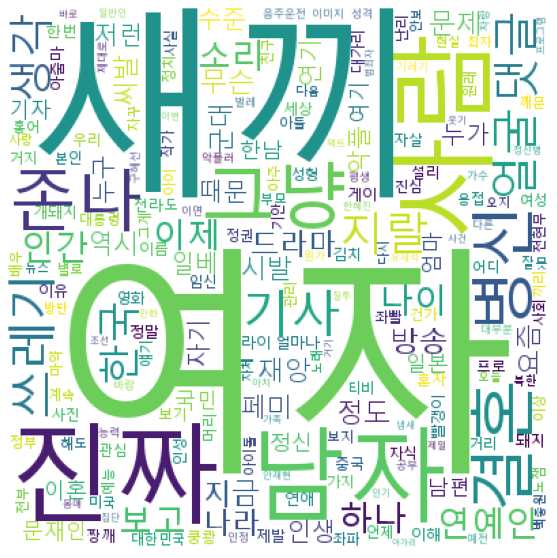

In [28]:
# 데이터 프레임을 딕셔너리로 변환(워드클라우드는 단어는 키, 빈도는 값으로 구성된 딕셔너리 자료 구조를 이용해 만듦. df_word는 데이터프레임이므로 딕셔너리로 변환해야 함)
dic_word_0 = df_word_0.set_index('word').to_dict()['n']

# wc 만들기
from wordcloud import WordCloud
wc = WordCloud(font_path='malgun',
               width = 400,                 # 가로 크기
               height = 400,                # 세로 크기
               background_color = 'white')  # 배경색

# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word_0)

# 워드 클라우드 출력하기
plt.figure(figsize = (10, 10))  # 가로, 세로 크기 설정
plt.axis('off')                 # 테두리 선 없애기
plt.imshow(img_wordcloud)       # 워드 클라우드 출력
plt.show()

In [29]:
comments = hate_data_1["content"].to_string()

In [30]:
okt = Okt()
nouns = okt.nouns(comments) # 명사만 추출

In [31]:
df_word_1 = pd.DataFrame({'word':nouns})
df_word_1['count'] = df_word_1['word'].str.len()
df_word_1 = df_word_1.query('count >= 2')

In [32]:
df_word_1 = df_word_1.groupby('word', as_index = False).agg(n = ('word', 'count')).sort_values('n', ascending = False)
top20_1 = df_word_1.head(20)

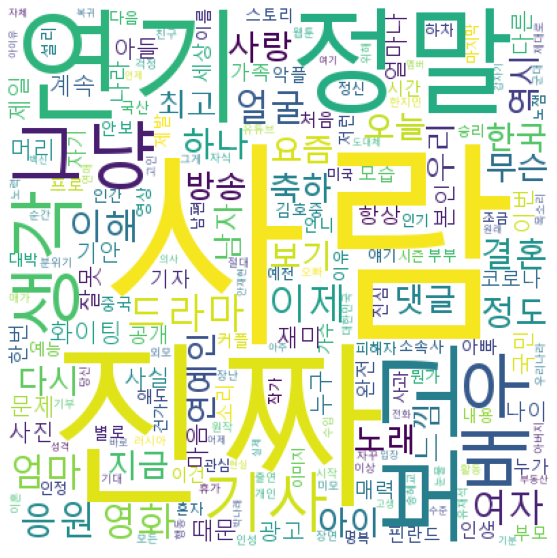

In [33]:
# 데이터 프레임을 딕셔너리로 변환(워드클라우드는 단어는 키, 빈도는 값으로 구성된 딕셔너리 자료 구조를 이용해 만듦. df_word는 데이터프레임이므로 딕셔너리로 변환해야 함)
dic_word_1 = df_word_1.set_index('word').to_dict()['n']

# wc 만들기
from wordcloud import WordCloud
wc = WordCloud(font_path='malgun',
               width = 400,                 # 가로 크기
               height = 400,                # 세로 크기
               background_color = 'white')  # 배경색

# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word_1)

# 워드 클라우드 출력하기
plt.figure(figsize = (10, 10))  # 가로, 세로 크기 설정
plt.axis('off')                 # 테두리 선 없애기
plt.imshow(img_wordcloud)       # 워드 클라우드 출력
plt.show()

In [34]:
# comments를 string 형태로 변환
comments = df["content"].to_string()

In [35]:
okt = Okt()
nouns = okt.nouns(comments) # 명사만 추출

In [36]:
# 데이터 프레임으로 변환
df_word = pd.DataFrame({'word':nouns})
df_word.head()

,word
0,이종석
1,한효주
2,드라마
3,이후
4,드라마


In [37]:
df_word['count'] = df_word['word'].str.len()
df_word.head()

,word,count
0,이종석,3
1,한효주,3
2,드라마,3
3,이후,2
4,드라마,3


In [38]:
# 두글자 이상 단어만 남기기
df_word = df_word.query('count >= 2')
df_word.sort_values('count').head()

,word,count
49790,만도,2
61783,기부,2
61784,검색,2
61785,한번,2
61786,광고,2


In [39]:
## 단어 빈도 구하기
df_word = df_word.groupby('word', as_index = False) \
                 .agg(n = ('word', 'count')) \
                 .sort_values('n', ascending = False)
df_word.head()

,word,n
4889,사람,806
6933,여자,804
9665,진짜,803
1758,남자,478
1089,그냥,411


In [40]:
# # 단어 빈도 상위 100개 추출
# top100 = df_word.head(100)
# top100

# 단어 빈도 상위 100개 추출
top20 = df_word.head(20)
top20

,word,n
4889,사람,806
6933,여자,804
9665,진짜,803
1758,남자,478
1089,그냥,411
5138,새끼,397
541,결혼,348
6996,연기,333
6767,얼굴,328
1240,기사,326


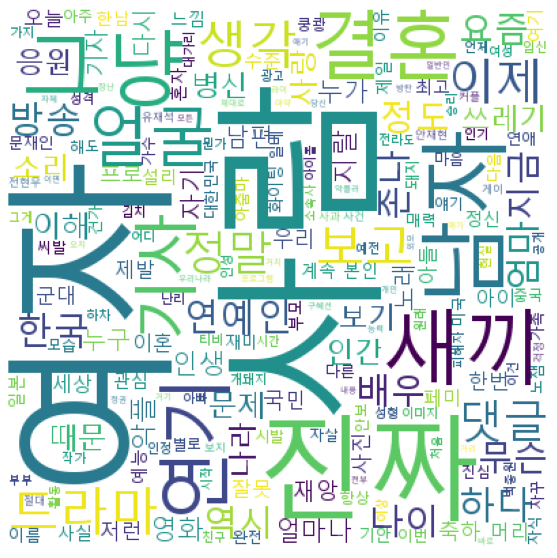

In [41]:
dic_word = df_word.set_index('word').to_dict()['n']
dic_word

# wc 만들기
from wordcloud import WordCloud
wc = WordCloud(font_path='malgun',
               width = 400,                 # 가로 크기
               height = 400,                # 세로 크기
               background_color = 'white')  # 배경색

# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력하기
plt.figure(figsize = (10, 10))  # 가로, 세로 크기 설정
plt.axis('off')                 # 테두리 선 없애기
plt.imshow(img_wordcloud)       # 워드 클라우드 출력
plt.show()

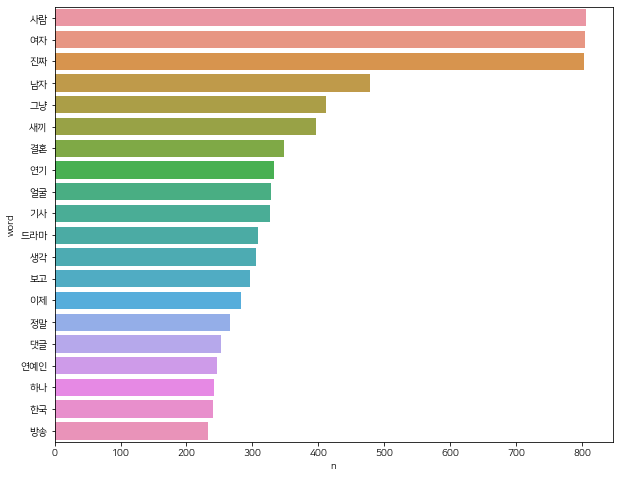

In [42]:
# 막대 그래프 만들기
plt.figure(figsize=(10, 8))
sns.barplot(data = top20, y = 'word', x = 'n')
plt.show()

## n-gram

In [43]:
df_0 = df[df['label'] == 0]
df_1 = df[df['label'] == 1]

In [44]:
df_0

,content,label
0,이종석 한효주 나오는 드라마 이후로 드라마 안봤다 2년전인가 좀 신선했었지 근데 이...,0
1,씨바알노무노무 술프노 오늘 저녁은 꽂등심이다ㅠㅜ,0
2,짱깨 꺼라ㅡ패쓰,0
5,다음도 들어와라하고다른 의견내는 유튜버 목 자르고추아줌마 꺼 여기저기서 진술나오니무...,0
7,나경아 젖깐사진이나 인스타에 좀올려라 물좀빼게,0
...,...,...
17879,히잌 기저귀 찬 년들이 군대 군대 주댕이 털고 자빠졌노ㅋ,0
17880,히트곡이 없는데 추억팔이가되는 놀라운 조선식 방송국연예매니징ㅋㅋ 기획사 소속사 걍 ...,0
17881,히트작이래봐야 미사 발리 두개 정도가 다고 연기력도 그저 그런 수준으로 배우로서 명...,0
17882,힘내라 이쁜 혜선아 다음엔 저런인간 만나지 말고,0


In [45]:
df_1

,content,label
3,그들의 사생활 고인이된 설리를 위해서라도 모두 조용하길 지금 누굴 탓한다고 무슨소...,1
4,아무리 법이 뭣같아도 무슨 자격으로 개인의 신상정보를 불특정 다수에게 공개하는지 도...,1
6,여자들도 아무한테나 자기야라고하는사람있는데 그것도성희롱인것같은데요,1
9,지연이 얼굴은 더 배우같네,1
10,건축학 개론 지금 다시 봤는데 솔직히 건축학 개론 보다는 아닙니다ㅋ 건축학 개론은 ...,1
...,...,...
17891,힘내세요 응원합니다,1
17892,힘내세요삼가 고인의 명복을 빕니다,1
17893,힘내세용 항상 응원합니닷,1
17894,힘내소연기로 답해요나도 53살 인데 이런일 저런일 다 있더라구요인격을 믿습니다홨팅,1


In [46]:
df_0['content'] = df_0['content'].str.replace(pat=r'[^\w]', repl=r' ', regex=True)

In [47]:
m_corpus_0 = []
for t in df_0['content'] :
    m_corpus_0.append(' '.join(okt.morphs(t)))

In [48]:
stop_words = set(['은', '는', '이', '가', '하', '아', '것', '들', '의', '있', '되', '수', '보', '주', '등', '한'])

In [49]:
def content_split(content) :
    words_list = []
    for i in content :
        if i != ' ' :
            words_list.append(i)
    return words_list

In [50]:
def preprocessing(content, okt, remove_stopwords=False, stop_words=[]) :
    word_content = okt.morphs(content, stem=True)
    
    if remove_stopwords :
        word_content = [token for token in word_content if not token in stop_words]
    
    return word_content

In [51]:
okt = Okt()
clean_df_0 = []

for content in df_0['content'] :
    if type(content) == str :
        clean_df_0.append(preprocessing(content, okt, remove_stopwords=True, stop_words=stop_words))
    else :
        clean_df_0.append([])


In [52]:
def get_top_ngram(corpus, n=None) :
    vec = CountVectorizer(ngram_range=(n,n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x : x[1], reverse=True)
    return words_freq[:20]

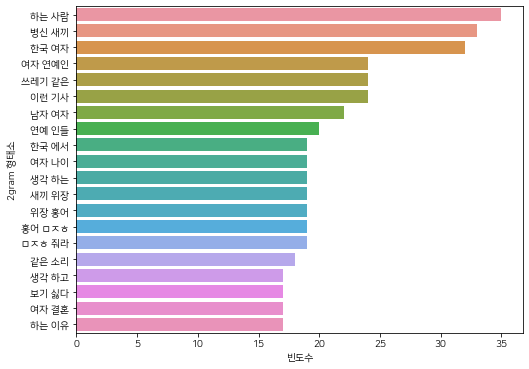

In [53]:
top_n_bigrams = get_top_ngram(m_corpus_0, 2)[:20]
x, y = map(list,zip(*top_n_bigrams))

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=y, y=x)
plt.rcParams['font.family'] = 'Malgun Gothic'
ax.set(xlabel='빈도수', ylabel='2gram 형태소')
plt.show()

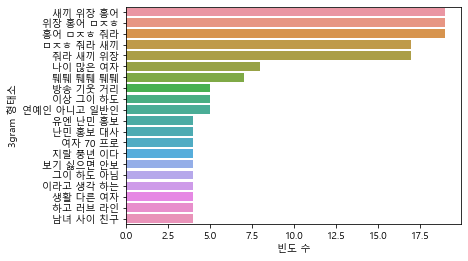

In [54]:
top_n_bigrams=get_top_ngram(m_corpus_0,3)[:20] 
x,y=map(list,zip(*top_n_bigrams)) 
ax = sns.barplot(x=y,y=x)
plt.rcParams['font.family'] = 'Malgun Gothic'
ax.set(xlabel = '빈도 수', ylabel = '3gram 형태소')
plt.show()

In [55]:
m_corpus_1 = []
for t in df_1['content'] :
    m_corpus_1.append(' '.join(okt.morphs(t)))

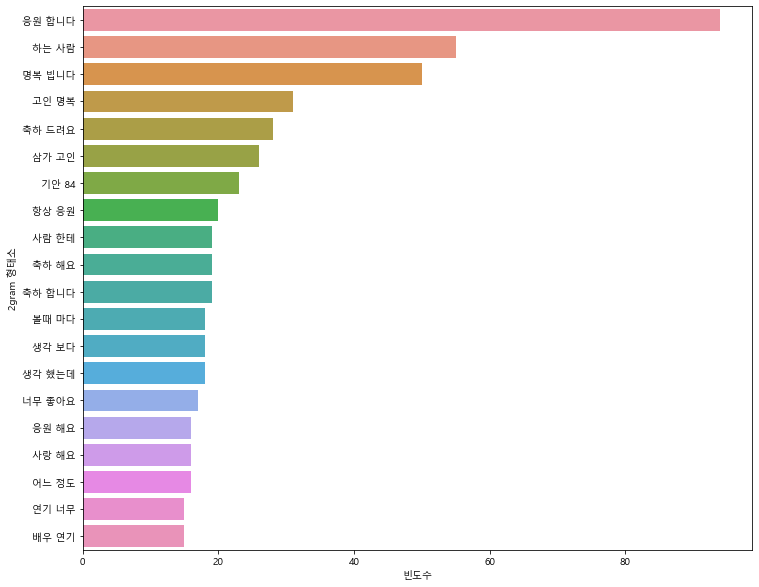

In [56]:
plt.figure(figsize=(12, 10))
top_n_bigrams = get_top_ngram(m_corpus_1, 2)[:20]
x, y = map(list,zip(*top_n_bigrams))
ax = sns.barplot(x=y, y=x)
plt.rc('font', size=20)
plt.rcParams['font.family'] = 'Malgun Gothic'
ax.set(xlabel='빈도수', ylabel='2gram 형태소')
plt.show()

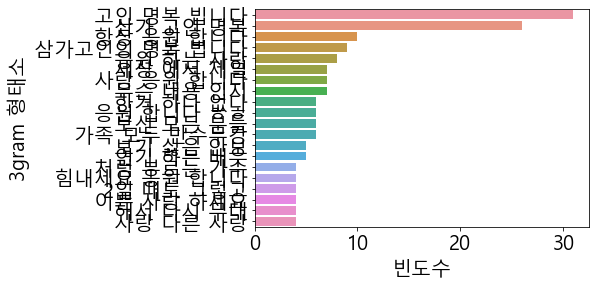

In [57]:
top_n_bigrams = get_top_ngram(m_corpus_1, 3)[:20]
x, y = map(list,zip(*top_n_bigrams))
ax = sns.barplot(x=y, y=x)
# plt.figure(figsize=(8, 6))
# plt.rcParams['font.family'] = 'Malgun Gothic'
ax.set(xlabel='빈도수', ylabel='3gram 형태소')
plt.show()

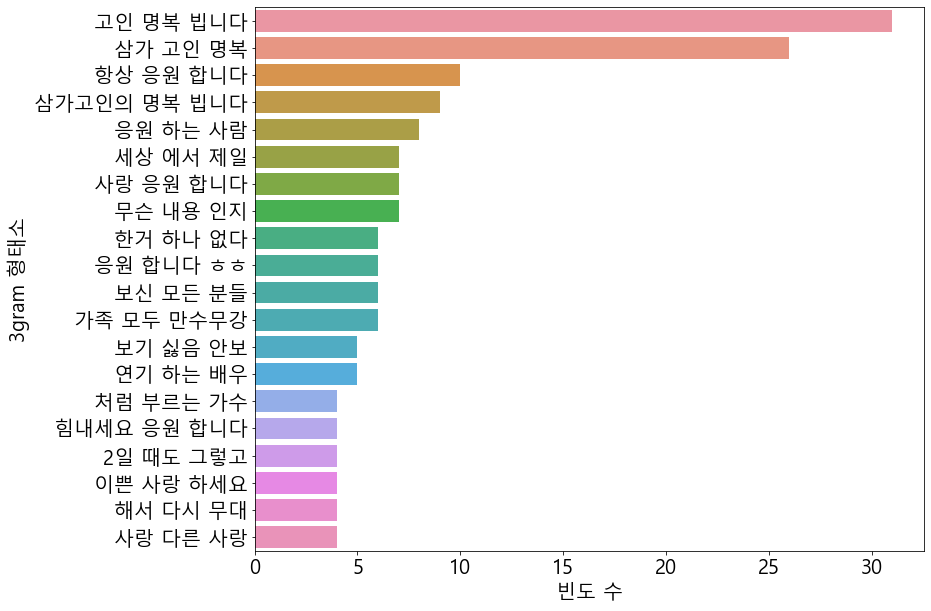

In [58]:
plt.figure(figsize=(12, 10))
top_n_bigrams=get_top_ngram(m_corpus_1,3)[:20] 
x,y=map(list,zip(*top_n_bigrams)) 
ax = sns.barplot(x=y,y=x)
plt.rcParams['font.family'] = 'Malgun Gothic'
ax.set(xlabel = '빈도 수', ylabel = '3gram 형태소')
plt.show()

## 단어 빈도수

In [59]:
content_0_list = list(df_0['content'])

In [60]:
content_0_list

['이종석 한효주 나오는 드라마 이후로 드라마 안봤다 2년전인가 좀 신선했었지 근데 이런 개막장 드라마는 도대체 누가 보느냐면 변태들이 보는 것이다 정상적인 사람들은 채널을 돌리게 된다',
 '씨바알노무노무 술프노 오늘 저녁은 꽂등심이다ㅠㅜ',
 '짱깨 꺼라ㅡ패쓰',
 '다음도 들어와라하고다른 의견내는 유튜버 목 자르고추아줌마 꺼 여기저기서 진술나오니무슨 기강감찰이니 하며 협박들어가고 댓글에 중국 러시아 욕하는 사람들 이제 아가리 닥쳐라 우리나라도 똑같이 되었다',
 '나경아 젖깐사진이나 인스타에 좀올려라 물좀빼게',
 '어린시절 가정교육 못 받은 애들은 절대 그 본성을 숨길수없지',
 '개별 공무원 뷰웅들의 헷지랄에 뭔 청와대까지 들먹이는지 빠끄네 때도 순시리가 개뻘짓했지 청와대는 암것도 않했지 말입니다',
 '서열1위네 좆냥이 찍소리도못함ㅋ',
 '대깨문이 문재인 협박범을 쉴드치네 역시 대가리가 붕어인듯',
 '예능 보면서 진지 빠는사람 많네 ㅋㅋ극혐 예능은 예능임 저거보고 인성 어쩌고저쩌고 ㅋㅋ어휴 노답',
 '오 ㄱㅊ노 박 하나 심어놓은다음에 존나패는거',
 '홍위병들 뭉가 추가 위한다고 아가리 돈이 들어오나',
 '시어머니 모셔다 친정엄마 생신상도 차려줄건가 제능력껏 하던가 친정엄마까지 모셔다 생고생시키면서 점수따고싶나 골빈건지 철딱서니가 없는건지 나이도 40 이나 먹었구만',
 '예술병 걸린 힙스터들이 또 오지게 의미부여하고 빨아줄듯',
 '오로지 냄비가 무기인 오징어썩은 냄새나는 세균덩어리김 치 년 들',
 '좆냥이주인쉑덜왜 집사집사 ㅇㅈㄹ함 ',
 '공장가야할새끼들이 재수한다고 지랄 꼴깝을 떨어대니깐 자기도 툭튀어 나오는거지 ㅋㅋ',
 '처먹는 예능 그만좀 해라예능이랍시고 노이즈 마케팅으로 식당 이용하는것도 아니고',
 '베트콩들 왜이리 나댑니까',
 '담배피는 여자연예인들 아갈똥네',
 '민주당이 압승인데 왜 이런걸로 지랄인지',
 '방탄소년단도 이제 퇴물됬네 꺼져라 이제 ㅋㅋ',
 '기독교 목사가 떡치고 다니고',
 '틀딱이네  먹을 나이 됐

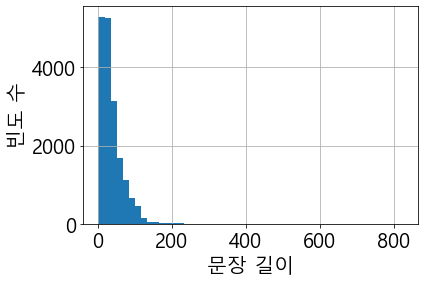

In [61]:
ax = df['content'].str.len().hist(bins=50)

ax.set_xlabel('문장 길이')
ax.set_ylabel('빈도 수')
plt.show()

Text(0, 0.5, '빈도 수')

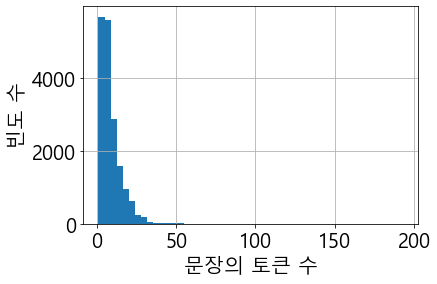

In [62]:
#토큰 수
ax = df['content'].str.split().map(lambda x: len(x)).hist(bins=50)

ax.set_xlabel('문장의 토큰 수')
ax.set_ylabel('빈도 수')

## 단어 길이 분포

In [63]:
token_content = [r.split() for r in df['content']]

In [64]:
content_len = [len(t) for t in token_content]

In [65]:
content_len_eumjeol = [len(s.replace(' ', '')) for s in df['content']]

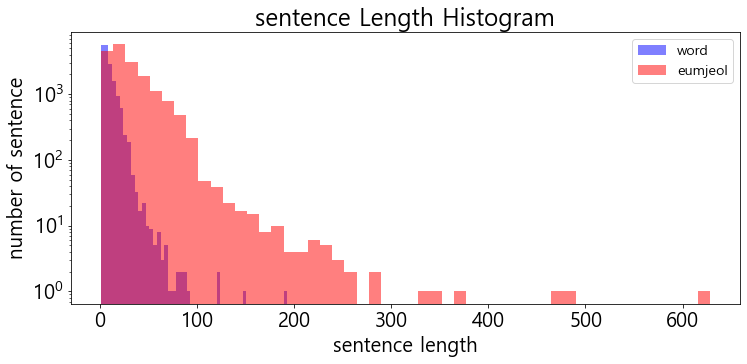

In [66]:
plt.figure(figsize = (12,5))

plt.hist(content_len, bins = 50, alpha=0.5, color="b", label="word")
plt.hist(content_len_eumjeol, bins = 50, alpha=0.5, color="r", label="eumjeol")

plt.yscale('log')
plt.title('sentence Length Histogram')
plt.xlabel('sentence length')
plt.ylabel('number of sentence')
plt.legend(fontsize=14)

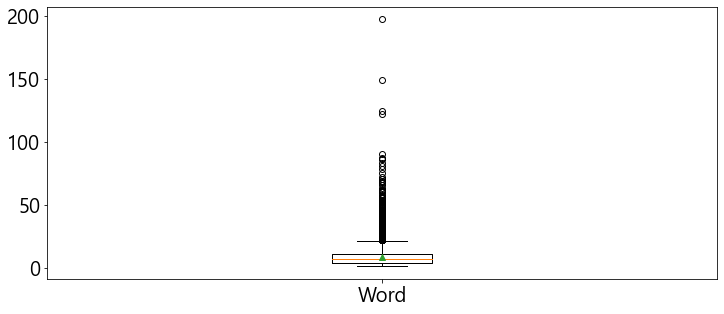

In [59]:
plt.figure(figsize=(12,5))
plt.boxplot([content_len],
            labels = ['Word'],
            showmeans=True)
plt.show()